### 1. Problem Statement

Develop a robust playing card recognition system utilizing a high-quality dataset of 7624 playing card images, partitioned into training, testing, and validation sets. Utilize advanced image processing and machine learning techniques to accurately identify 53 types of cards from cropped images, ensuring scalability and real-time applicability.

In [1]:
# Import the necessary libraries required for creating a model.

import numpy as np
import pandas as pd
import os
import random
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

import keras
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator 
import keras
from keras.models import Model,Sequential
from tensorflow.keras import layers, models,optimizers
from keras.layers import Input,Dense,Conv2D,AveragePooling2D,Flatten,MaxPooling2D,BatchNormalization,Dropout

C:\ProgramData\Anaconda3\lib\site-packages\requests\__init__.py:91: RequestsDependencyWarning: urllib3 (2.0.7) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)
Using TensorFlow backend.


### 2. Data Collection
#### About Data 
This is a very high quality dataset of playing card images. All images are 224 X 224 X 3 in jpg format. All images in the dataset have been cropped so that only the image of a single card is present and the card occupies well over 50% of the pixels in the image. There are 7624 training images, 265 test images and 265 validation images. The train, test and validation directories are partitioned into 53 sub directories , one for each of the 53 types of cards. The dataset also includes a csv file which can be used to load the datasets.

In [2]:
# Training Data

training_dict = dict()

training_data = []
training_cv = []

for folder in os.listdir(r"C:\Users\LAKSHMI NARASIMHARAO\innomatics\Deep Learning\Projects\Cards prediction\train"):
    count=0
    for image in os.listdir(r"C:\Users\LAKSHMI NARASIMHARAO\innomatics\Deep Learning\Projects\Cards prediction\train\{}".format(folder)):
        training_data.append(cv2.imread(r"C:\Users\LAKSHMI NARASIMHARAO\innomatics\Deep Learning\Projects\Cards prediction\train\{}\{}".format(folder,image)))
        training_cv.append(folder)
        count+=1
    training_dict[folder]=count

In [3]:
print(len(training_data))
print(len(training_cv))

7624
7624


In [4]:
# validation Data
validation_data = []
validation_cv = []

for folder in os.listdir(r"C:\Users\LAKSHMI NARASIMHARAO\innomatics\Deep Learning\Projects\Cards prediction\valid"):
    for image in os.listdir(r"C:\Users\LAKSHMI NARASIMHARAO\innomatics\Deep Learning\Projects\Cards prediction\valid\{}".format(folder)):
        validation_data.append(cv2.imread(r"C:\Users\LAKSHMI NARASIMHARAO\innomatics\Deep Learning\Projects\Cards prediction\valid\{}\{}".format(folder,image)))
        validation_cv.append(folder)

In [5]:
print(len(validation_data))
print(len(validation_cv))

265
265


In [6]:
# test Data
test_data = []
test_cv = []

for folder in os.listdir(r"C:\Users\LAKSHMI NARASIMHARAO\innomatics\Deep Learning\Projects\Cards prediction\test"):
    for image in os.listdir(r"C:\Users\LAKSHMI NARASIMHARAO\innomatics\Deep Learning\Projects\Cards prediction\test\{}".format(folder)):
        test_data.append(cv2.imread(r"C:\Users\LAKSHMI NARASIMHARAO\innomatics\Deep Learning\Projects\Cards prediction\test\{}\{}".format(folder,image)))
        test_cv.append(folder)

In [7]:
print(len(test_data))
print(len(test_cv))

262
262


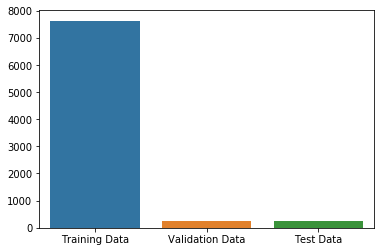

In [8]:
sns.barplot(x=["Training Data", "Validation Data", "Test Data"], y=[7624, 265, 262])
plt.show()


### 3. EDA

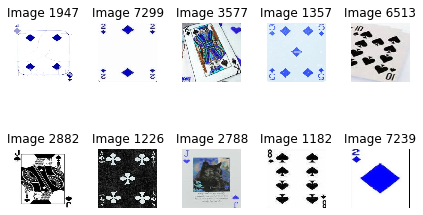

In [9]:
# Some images from training data

list_index = []

fig, axes = plt.subplots(2, 5)

for i in range(2):
    for j in range(5):
        index_ = random.randint(0, len(training_data) - 1)
        axes[i, j].imshow(training_data[index_])
        axes[i, j].axis('off')  
        axes[i, j].set_title('Image ' + str(index_)) 
        list_index.append(index_)
        
plt.tight_layout() 
plt.show()


In [10]:
for i in list_index:                                                   # each image shape is (224,224,3) in training data
    print('Shape of the training image is :',training_data[i].shape)

Shape of the training image is : (224, 224, 3)
Shape of the training image is : (224, 224, 3)
Shape of the training image is : (224, 224, 3)
Shape of the training image is : (224, 224, 3)
Shape of the training image is : (224, 224, 3)
Shape of the training image is : (224, 224, 3)
Shape of the training image is : (224, 224, 3)
Shape of the training image is : (224, 224, 3)
Shape of the training image is : (224, 224, 3)
Shape of the training image is : (224, 224, 3)


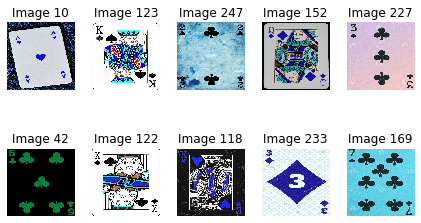

In [11]:
# Some images from validation data

list_index = []

fig, axes = plt.subplots(2, 5)

for i in range(2):
    for j in range(5):
        index_ = random.randint(0, len(validation_data) - 1)
        axes[i, j].imshow(validation_data[index_])
        axes[i, j].axis('off')  
        axes[i, j].set_title('Image ' + str(index_)) 
        list_index.append(index_)
        
plt.tight_layout() 
plt.show()


In [12]:
for i in list_index:
    print('Shape of the validation image is :',validation_data[i].shape) # each image shape is (224,224,3) in validation data

Shape of the validation image is : (224, 224, 3)
Shape of the validation image is : (224, 224, 3)
Shape of the validation image is : (224, 224, 3)
Shape of the validation image is : (224, 224, 3)
Shape of the validation image is : (224, 224, 3)
Shape of the validation image is : (224, 224, 3)
Shape of the validation image is : (224, 224, 3)
Shape of the validation image is : (224, 224, 3)
Shape of the validation image is : (224, 224, 3)
Shape of the validation image is : (224, 224, 3)


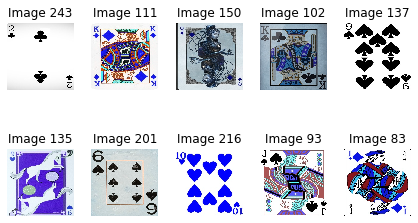

In [13]:
# Some images from test data

list_index = []

fig, axes = plt.subplots(2, 5)

for i in range(2):
    for j in range(5):
        index_ = random.randint(0, len(test_data) - 1)
        axes[i, j].imshow(test_data[index_])
        axes[i, j].axis('off')  
        axes[i, j].set_title('Image ' + str(index_)) 
        list_index.append(index_)
        
plt.tight_layout() 
plt.show()


In [14]:
for i in list_index:
    print('Shape of the test_data image is :',test_data[i].shape) # each image shape is (224,224,3) in test data

Shape of the test_data image is : (224, 224, 3)
Shape of the test_data image is : (224, 224, 3)
Shape of the test_data image is : (224, 224, 3)
Shape of the test_data image is : (224, 224, 3)
Shape of the test_data image is : (224, 224, 3)
Shape of the test_data image is : (224, 224, 3)
Shape of the test_data image is : (224, 224, 3)
Shape of the test_data image is : (224, 224, 3)
Shape of the test_data image is : (224, 224, 3)
Shape of the test_data image is : (224, 224, 3)


### Data distribution

In [15]:
import pandas as pd
data_distribution = pd.DataFrame(list(training_dict.items()), columns=['class label', 'count'])
data_distribution.head()

,class label,count
0,ace of clubs,120
1,ace of diamonds,129
2,ace of hearts,171
3,ace of spades,181
4,eight of clubs,138


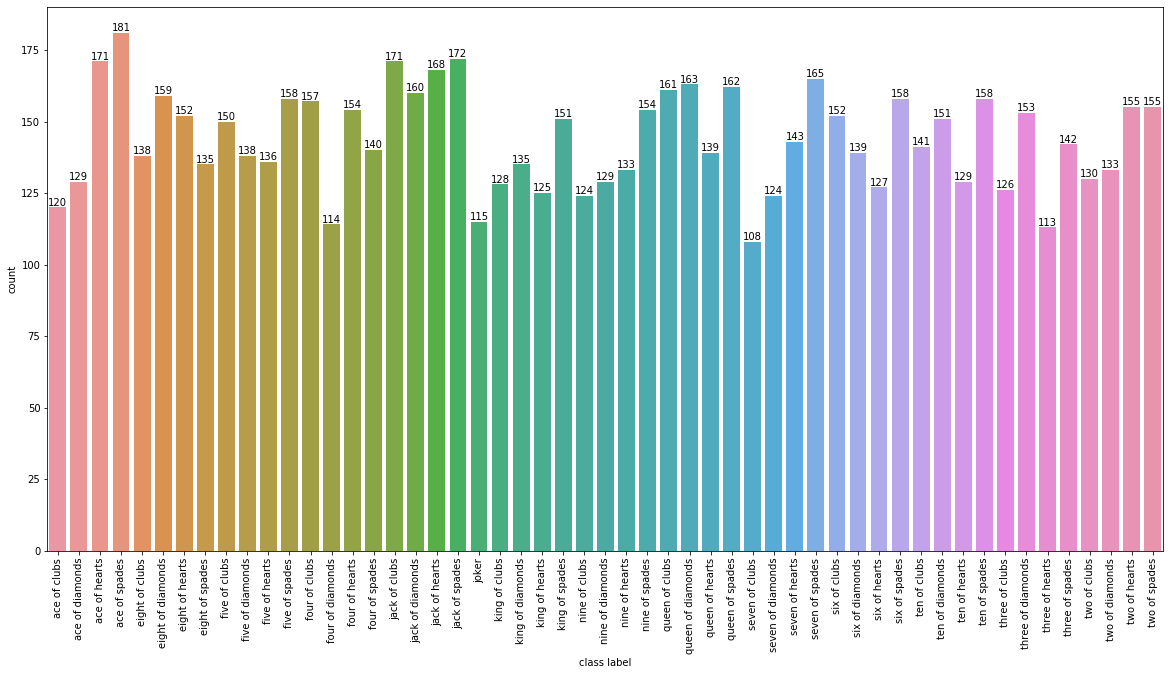

In [16]:
plt.figure(figsize=(20,10))
sns.barplot(x=data_distribution['class label'], y=data_distribution['count'])

for index, value in enumerate(data_distribution['count']):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=90)
plt.show()


### Quality of images

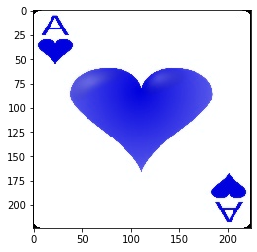

Laplacian Variance (Sharpness): 4471.416023796173


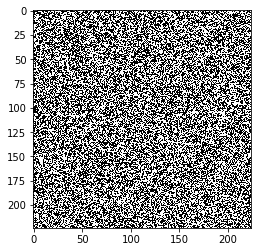

Image Resolution: (224, 224)


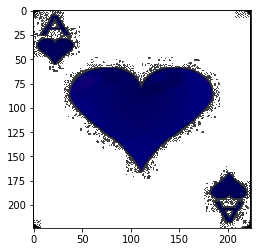

Uniformity Score: 76490.0
Laplacian Variance (Blur): 4471.416023796173


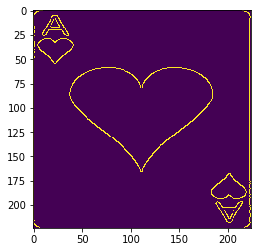

In [17]:
image_path = r"C:\Users\LAKSHMI NARASIMHARAO\innomatics\Deep Learning\Projects\Cards prediction\train\ace of hearts\003.jpg"
image = cv2.imread(image_path)

# 1. Visual Inspection

plt.imshow(image)
plt.show()

# 2. Sharpness Analysis
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
laplacian_var = cv2.Laplacian(gray_image, cv2.CV_64F).var()
print("Laplacian Variance (Sharpness):", laplacian_var)

# 3. Noise Analysis (Example: Salt and Pepper Noise)
noisy_image = image.copy()
noise = np.random.randint(0, 2, size=image.shape[:2]) * 255
noisy_image[np.where(noise == 255)] = [255, 255, 255]  
noisy_image[np.where(noise == 0)] = [0, 0, 0]

plt.imshow(noisy_image)
plt.show()

# 4. Resolution and Compression
resolution = image.shape[:2]
print("Image Resolution:", resolution)

# 5. Color Balance (Example: Histogram Equalization)
lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
lab_planes = cv2.split(lab_image)
lab_planes[0] = cv2.equalizeHist(lab_planes[0])
equalized_lab = cv2.merge(lab_planes)
equalized_image = cv2.cvtColor(equalized_lab, cv2.COLOR_LAB2BGR)

plt.imshow(equalized_image)
plt.show()

# 6. Uniformity (Example: Histogram Analysis)
histogram = cv2.calcHist([gray_image], [0], None, [256], [0, 256])
uniformity_score = np.sum(np.abs(histogram - np.mean(histogram)))
print("Uniformity Score:", uniformity_score)

# 7. Blur Detection (Example: Laplacian Variance)
laplacian_var = cv2.Laplacian(gray_image, cv2.CV_64F).var()
print("Laplacian Variance (Blur):", laplacian_var)

# 8. Artifact Detection (Example: Edge Detection)
edges = cv2.Canny(gray_image, 100, 200)
plt.imshow(edges)
plt.show()


### 4. Pre-processing

In [18]:
# convert list to array
training_data = np.asarray(training_data)
validation_data = np.asarray(validation_data)
test_data = np.asarray(test_data)

training_cv = np.asarray(training_cv)
validation_cv = np.asarray(validation_cv)
test_cv = np.asarray(test_cv)

# convert categorical data into numerical
le = LabelEncoder()
training_cv = le.fit_transform(training_cv)
validation_cv = le.transform(validation_cv)
test_cv = le.transform(test_cv)

In [19]:
train_gen = ImageDataGenerator(rotation_range = 20,zoom_range=0.2, horizontal_flip=False,
                                  shear_range=0.2,rescale=1./255)

test_gen = ImageDataGenerator(rescale=1./255)

In [20]:
train_path1 = r"C:\Users\LAKSHMI NARASIMHARAO\innomatics\Deep Learning\Projects\Cards prediction\train"

valid_path1 = r"C:\Users\LAKSHMI NARASIMHARAO\innomatics\Deep Learning\Projects\Cards prediction\valid"

test_path1 = r"C:\Users\LAKSHMI NARASIMHARAO\innomatics\Deep Learning\Projects\Cards prediction\test"

In [21]:
train_set1 = train_gen.flow_from_directory(train_path1,
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode = 'categorical')

valid_set1 = test_gen.flow_from_directory(valid_path1,
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode='categorical')

test_set1 = test_gen.flow_from_directory(test_path1,
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode='categorical')

Found 7624 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
Found 262 images belonging to 53 classes.


In [22]:
training_data[0].shape

(224, 224, 3)

### 5. Model Building  and  6. Evaluation

### i. Vanilla  Model 

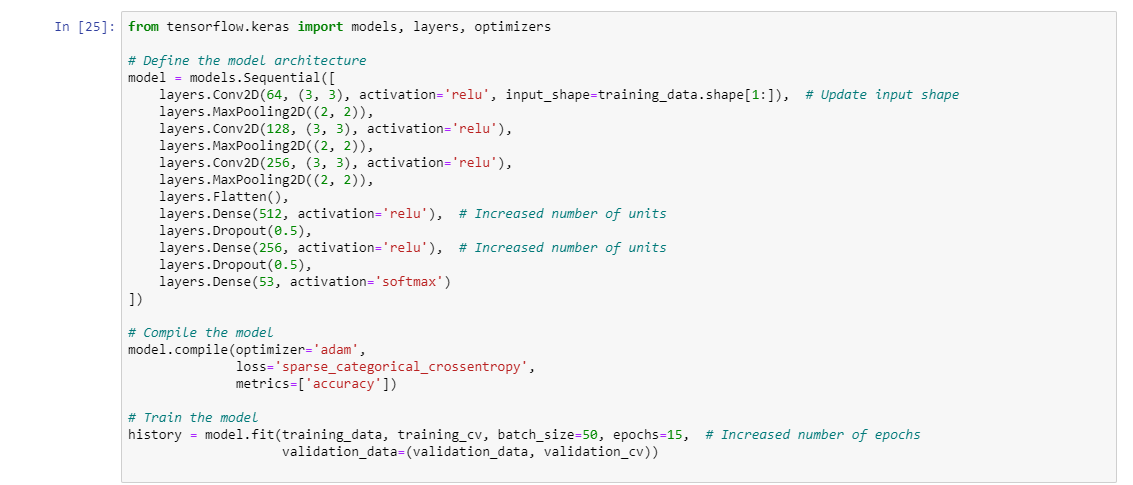

In [23]:
from IPython.display import Image

Image(filename=r"C:\Users\LAKSHMI NARASIMHARAO\innomatics\Deep Learning\Projects\Cards prediction\vanilla_model_build.png")


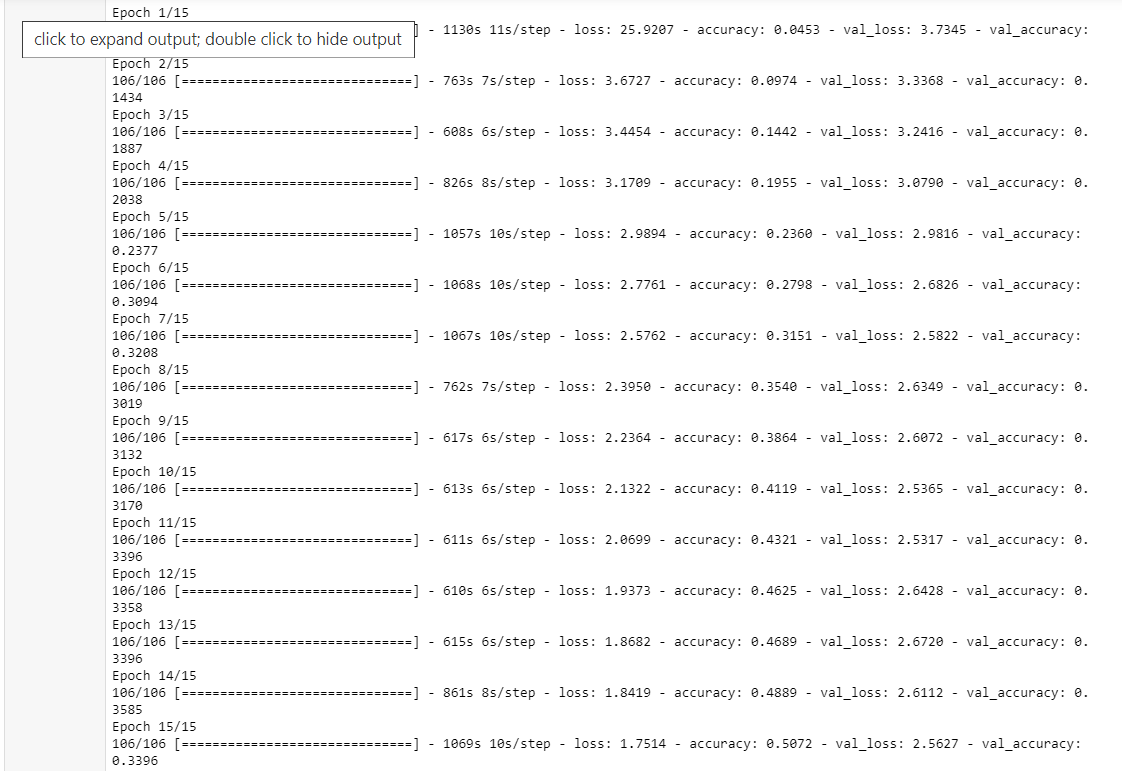

In [24]:
from IPython.display import Image

Image(filename=r"C:\Users\LAKSHMI NARASIMHARAO\innomatics\Deep Learning\Projects\Cards prediction\vanill_result.png")


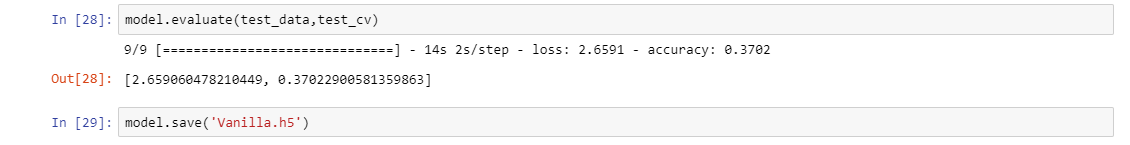

In [25]:
from IPython.display import Image

Image(filename=r"C:\Users\LAKSHMI NARASIMHARAO\innomatics\Deep Learning\Projects\Cards prediction\vanilla_evaluate.png")


### ii. VGG16 Model

### iii. MobileNet

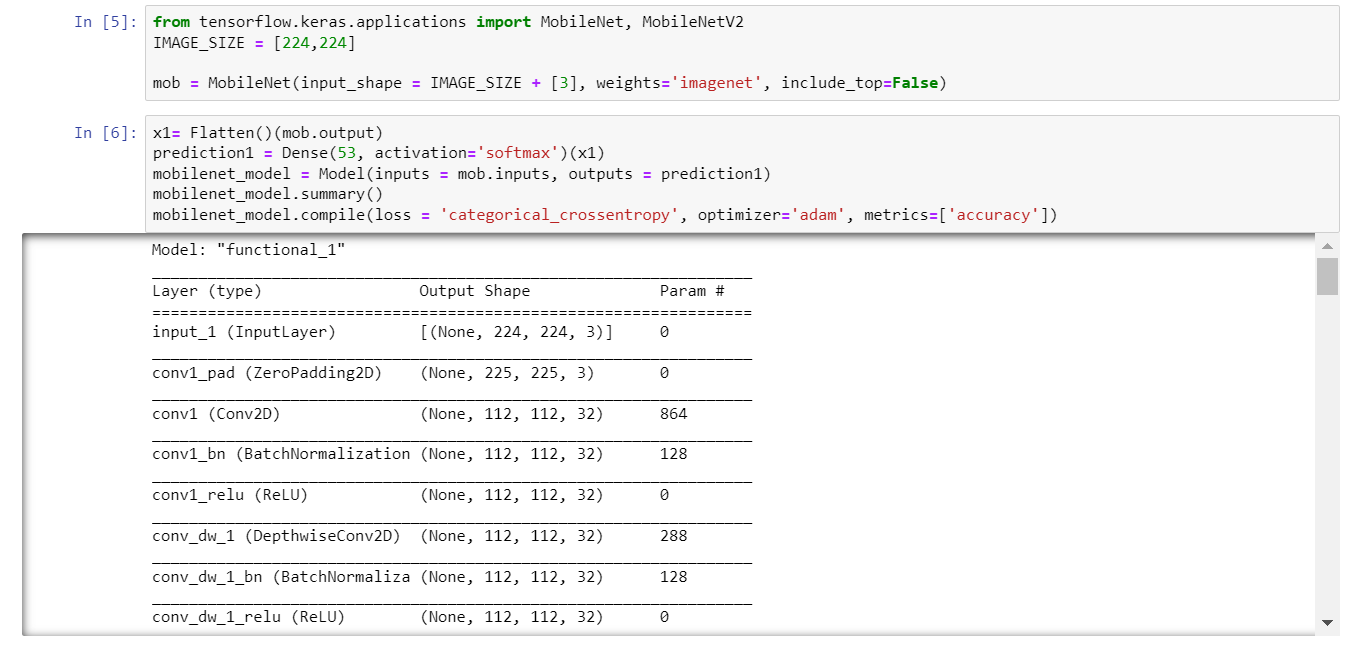

In [26]:
from IPython.display import Image

Image(filename=r"C:\Users\LAKSHMI NARASIMHARAO\innomatics\Deep Learning\Projects\Cards prediction\mobilenet_model_build.png")


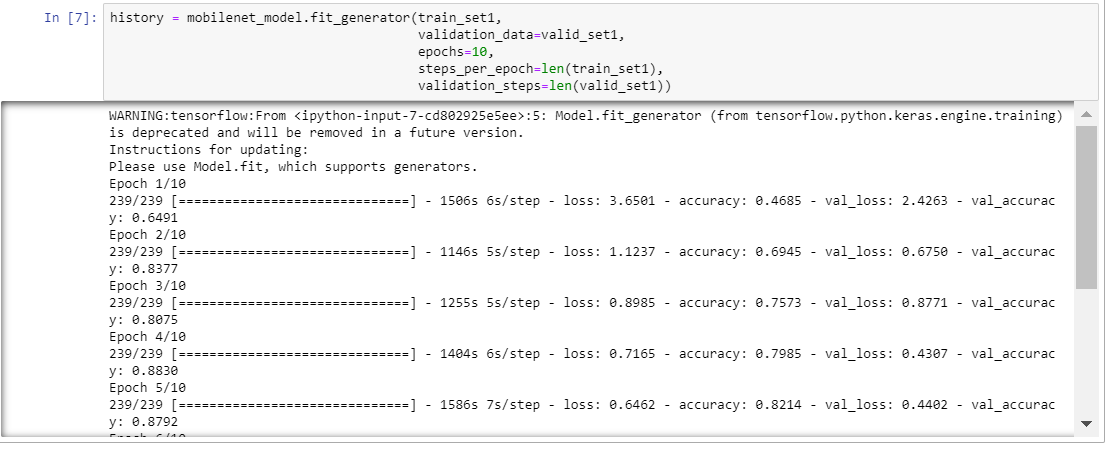

In [27]:
Image(filename=r"C:\Users\LAKSHMI NARASIMHARAO\innomatics\Deep Learning\Projects\Cards prediction\mobilenet_train.png")

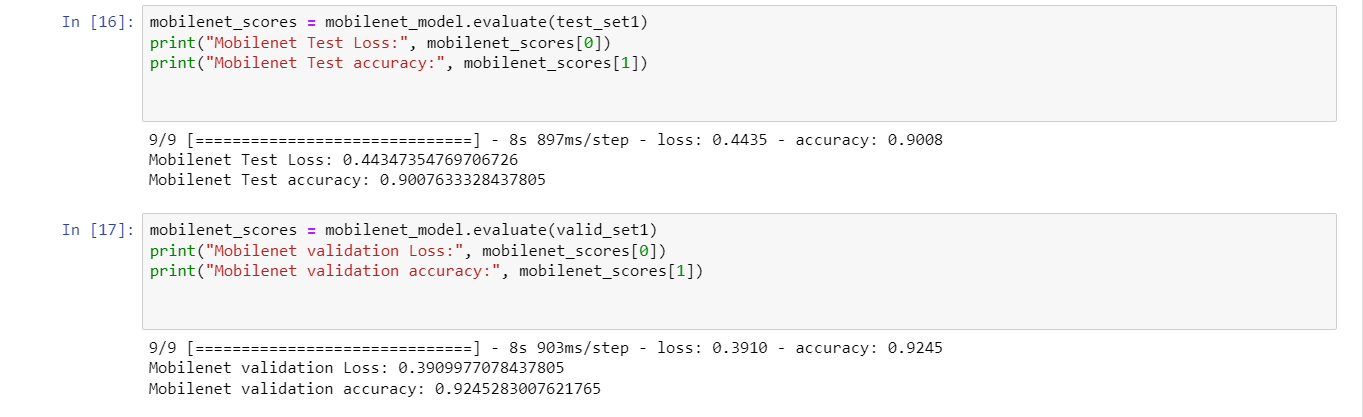

In [28]:
Image(filename=r'C:\Users\LAKSHMI NARASIMHARAO\innomatics\Deep Learning\Projects\Cards prediction\mobilenet_evaluation.png')

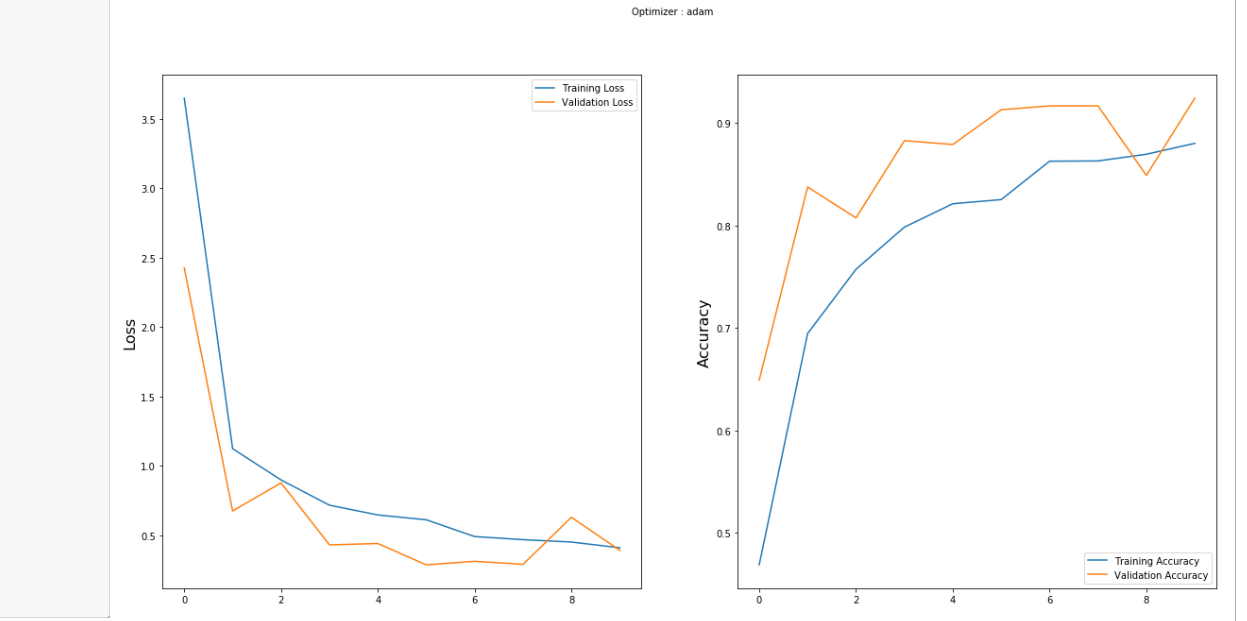

In [29]:
Image(filename=r"C:\Users\LAKSHMI NARASIMHARAO\innomatics\Deep Learning\Projects\Cards prediction\mobilnet_graph.png")

#### mobilenet_model.save('cards_mobilenet.h5')

### 7. Testing

In [30]:
result = {'ace of clubs': 0,
 'ace of diamonds': 1,
 'ace of hearts': 2,
 'ace of spades': 3,
 'eight of clubs': 4,
 'eight of diamonds': 5,
 'eight of hearts': 6,
 'eight of spades': 7,
 'five of clubs': 8,
 'five of diamonds': 9,
 'five of hearts': 10,
 'five of spades': 11,
 'four of clubs': 12,
 'four of diamonds': 13,
 'four of hearts': 14,
 'four of spades': 15,
 'jack of clubs': 16,
 'jack of diamonds': 17,
 'jack of hearts': 18,
 'jack of spades': 19,
 'joker': 20,
 'king of clubs': 21,
 'king of diamonds': 22,
 'king of hearts': 23,
 'king of spades': 24,
 'nine of clubs': 25,
 'nine of diamonds': 26,
 'nine of hearts': 27,
 'nine of spades': 28,
 'queen of clubs': 29,
 'queen of diamonds': 30,
 'queen of hearts': 31,
 'queen of spades': 32,
 'seven of clubs': 33,
 'seven of diamonds': 34,
 'seven of hearts': 35,
 'seven of spades': 36,
 'six of clubs': 37,
 'six of diamonds': 38,
 'six of hearts': 39,
 'six of spades': 40,
 'ten of clubs': 41,
 'ten of diamonds': 42,
 'ten of hearts': 43,
 'ten of spades': 44,
 'three of clubs': 45,
 'three of diamonds': 46,
 'three of hearts': 47,
 'three of spades': 48,
 'two of clubs': 49,
 'two of diamonds': 50,
 'two of hearts': 51,
 'two of spades': 52}

### i. Vanilla

output is : {'four of spades'}


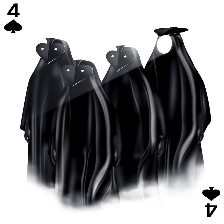

In [31]:
import tensorflow

vanilla = tensorflow.keras.models.load_model("Vanilla.h5")

path = r"C:\Users\LAKSHMI NARASIMHARAO\innomatics\Deep Learning\Projects\Cards prediction\test\four of spades\5.jpg"

img = cv2.imread(path)

output = np.argmax(vanilla.predict(cv2.resize(img,(224,224),interpolation=cv2.INTER_AREA)[np.newaxis]))

value = {i for i in result if result[i]==output}
print("output is :",value)

Image(filename=path)

### ii. Vgg16

output is : {'ace of hearts'}


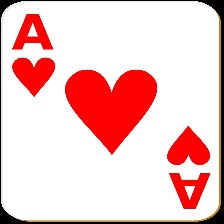

In [32]:
import tensorflow

vgg16_ = tensorflow.keras.models.load_model("cards_vgg16.h5")

path = r"C:\Users\LAKSHMI NARASIMHARAO\innomatics\Deep Learning\Projects\Cards prediction\test\ace of hearts\5.jpg"

img = cv2.imread(path)

output = np.argmax(vgg16_.predict(cv2.resize(img,(224,224),interpolation=cv2.INTER_AREA)[np.newaxis]))

value = {i for i in result if result[i]==output}
print("output is :",value)

Image(filename=path)

### iii. MobileNet

output is : {'two of hearts'}


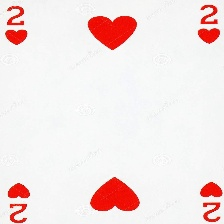

In [38]:
import tensorflow

mobilenet_ = tensorflow.keras.models.load_model("cards_mobilenet.h5")

path = r"C:\Users\LAKSHMI NARASIMHARAO\innomatics\Deep Learning\Projects\Cards prediction\train\two of hearts\003.jpg"

img = cv2.imread(path)

output = np.argmax(mobilenet_.predict(cv2.resize(img,(224,224),interpolation=cv2.INTER_AREA)[np.newaxis]))

value = {i for i in result if result[i]==output}
print("output is :",value)

Image(filename=path)

### 8. Conclusion
In conclusion, the provided dataset presents a valuable resource for developing and evaluating models for playing card recognition tasks. With a meticulously curated collection of 7624 images, each cropped to highlight a single card occupying a significant portion of the pixels, the dataset offers consistent and high-quality data for training, validation, and testing. Organized into 53 subdirectories, corresponding to the diverse range of card types, this partitioning facilitates targeted analysis and model development. Furthermore, the inclusion of a CSV file simplifies dataset loading and management, streamlining the development process. Overall, this dataset serves as a robust foundation for advancing research and applications in playing card image recognition.